# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [15]:
# Load pickled data
import pickle
import pandas as pd
import numpy as np
import random
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2


training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [16]:
dict_signs = {0:"Speed limit (20km/h)",
1:"Speed limit (30km/h)",
2:"Speed limit (50km/h)",
3:"Speed limit (60km/h)",
4:"Speed limit (70km/h)",
5:"Speed limit (80km/h)",
6:"End of speed limit (80km/h)",
7:"Speed limit (100km/h)",
8:"Speed limit (120km/h)",
9:"No passing",
10:"No passing for vehicles over 3.5 metric tons",
11:"Right-of-way at the next intersection",
12:"Priority road",
13:"Yield",
14:"Stop",
15:"No vehicles",
16:"Vehicles over 3.5 metric tons prohibited",
17:"No entry",
18:"General caution",
19:"Dangerous curve to the left",
20:"Dangerous curve to the right",
21:"Double curve",
22:"Bumpy road",
23:"Slippery road",
24:"Road narrows on the right",
25:"Road work",
26:"Traffic signals",
27:"Pedestrians",
28:"Children crossing",
29:"Bicycles crossing",
30:"Beware of ice/snow",
31:"Wild animals crossing",
32:"End of all speed and passing limits",
33:"Turn right ahead",
34:"Turn left ahead",
35:"Ahead only",
36:"Go straight or right",
37:"Go straight or left",
38:"Keep right",
39:"Keep left",
40:"Roundabout mandatory",
41:"End of no passing",
42:"End of no passing by vehicles over 3.5 metric tons"}


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [67]:
### Replace each question mark with the appropriate value.
### Use python, pandas or numpy methods rather than hard coding the results

d = {'y_train': y_train, 'count' : int(0)}
df = pd.DataFrame(data=d, index=[i for i in range(len(y_train))])
counter = df.groupby("y_train")['y_train'].agg({'count': "count"})
df_final = pd.DataFrame(data=counter, index=[i for i in range(len(counter))])

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape train =", image_shape)
print("Image data shape test =", X_test.shape)
print("Image data shape valid =", X_valid.shape)
print("Number of classes train =", n_classes)
print("Number of classes test =", len(np.unique(y_test)))
print("Number of classes valid =", len(np.unique(y_valid)))

print(df_final)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape train = (34799, 32, 32, 3)
Image data shape test = (12630, 32, 32, 3)
Image data shape valid = (4410, 32, 32, 3)
Number of classes train = 43
Number of classes test = 43
Number of classes valid = 43
    count
0     180
1    1980
2    2010
3    1260
4    1770
5    1650
6     360
7    1290
8    1260
9    1320
10   1800
11   1170
12   1890
13   1920
14    690
15    540
16    360
17    990
18   1080
19    180
20    300
21    270
22    330
23    450
24    240
25   1350
26    540
27    210
28    480
29    240
30    390
31    690
32    210
33    599
34    360
35   1080
36    330
37    180
38   1860
39    270
40    300
41    210
42    210


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

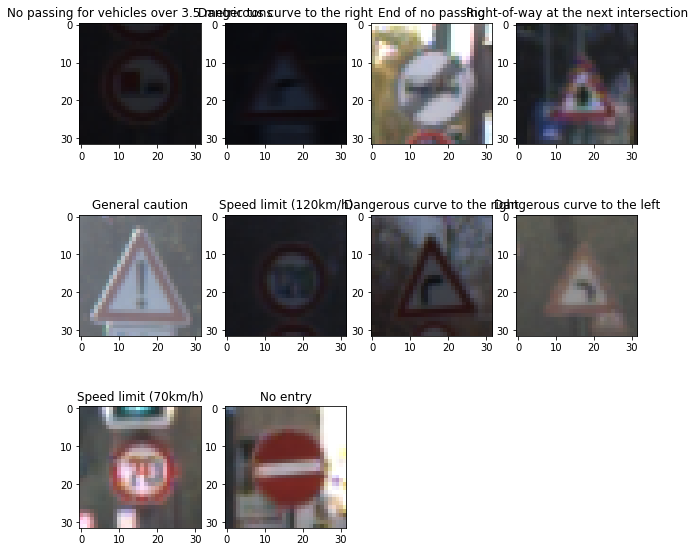

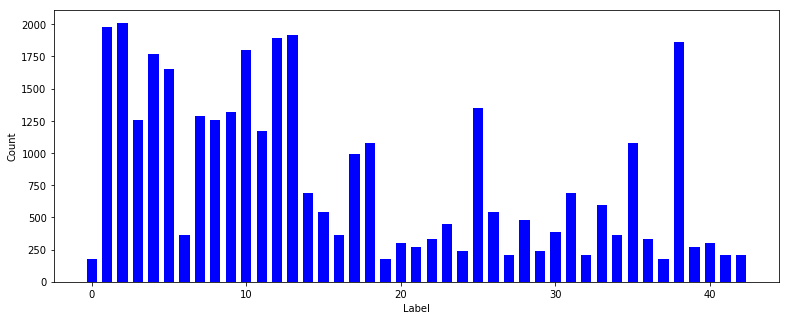

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.figure(figsize=(10, 10))
for i in range(10):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.subplot(3, 4, i+1)
    plt.imshow(image)
    plt.title(dict_signs[y_train[index]])
plt.show()

plt.figure(figsize=(13,5))
plt.xlabel("Label")
plt.ylabel("Count")
width = 1/1.5
plt.bar(df_final.index, df_final['count'], width, color="blue")
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

for img in X_train:
    cv2.normalize(src=img, dst=img, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)


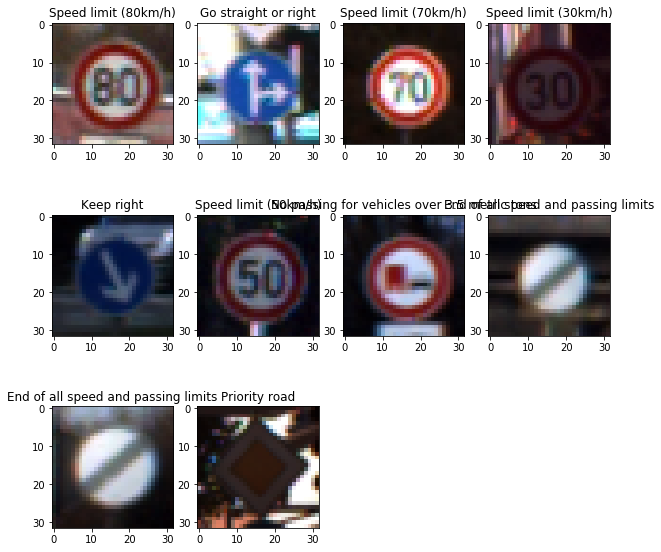

In [6]:
plt.figure(figsize=(10, 10))
for i in range(10):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.subplot(3, 4, i+1)
    plt.imshow(image)
    plt.title(dict_signs[y_train[index]])
plt.show()

### Model Architecture

In [77]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

#SAME Padding, the output height and width are computed as:
#out_height = in_height / strides

#VALID Padding, the output height and width are computed as:
#out_height = in_height - filter_height + 1) / strides

def convolution(x, filter_size, kernels):
    conv2d = keras.layers.Conv2D(kernels, filter_size, padding='valid',
                                 strides=[1, 1],
                                 activation='relu')(x)
    return conv2d

def fully_connected(x, output_):
    l1 = tf.keras.layers.Dense(units=output_, activation='relu')(x)
    return l1

# inspired by CIFAR-10 architecture
def LeNet(input_):
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1 = convolution(inputs, (5, 5), 6)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = keras.layers.AveragePooling2D()(conv1)

    # Normalization
    conv1 = keras.layers.BatchNormalization()(conv1)

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2 = convolution(conv1, (5, 5), 16)

    # Normalization
    conv2 = keras.layers.BatchNormalization()(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = keras.layers.AveragePooling2D()(conv2)

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = keras.layers.Flatten()(conv2)

    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = fully_connected(fc0, 120)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = fully_connected(fc1, 84)

    # Test 1 drop out
    fc2 = keras.layers.Dropout(0.5)(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.    
    ret = tf.keras.layers.Dense(units=n_classes, activation='softmax', name="output")(fc2)
    
    return ret

In [78]:
rate = 0.0005

inputs = keras.layers.Input(shape=(32, 32, 3), name="input")
lenet = LeNet(inputs)

optimizer = keras.optimizers.Adam(lr=rate)
model = keras.models.Model(inputs=inputs, outputs=lenet, name="LeNet")
model.compile(optimizer, loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [79]:
model.summary()

Model: "LeNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d_4 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 6)         24        
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 16)        64        
_________________________________________________________________
average_pooling2d_5 (Average (None, 5, 5, 16)          0     

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [80]:
model.fit(x=X_train, 
          y=keras.utils.to_categorical(y_train, num_classes=n_classes),
          batch_size=32, epochs=2, verbose=1, callbacks=None,
          validation_data=(X_test, keras.utils.to_categorical(y_test, num_classes=n_classes)))

Train on 34799 samples, validate on 12630 samples
Epoch 1/2
34799/34799 [==============================] - 65s 2ms/sample - loss: 1.4222 - accuracy: 0.6100 - val_loss: 0.5051 - val_accuracy: 0.8571
Epoch 2/2
34799/34799 [==============================] - 59s 2ms/sample - loss: 0.3602 - accuracy: 0.8951 - val_loss: 0.3386 - val_accuracy: 0.9078


In [81]:
scores = model.evaluate(X_valid, keras.utils.to_categorical(y_valid, num_classes=n_classes), verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4410/4410 [==============================] - 2s 375us/sample - loss: 0.3510 - accuracy: 0.9077
accuracy: 90.77%


In [12]:
model.save('lenet.h5')  # creates a HDF5 file 'lenet.h5'

# returns a compiled model
#model = load_model('my_model.h5')

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.947


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

16


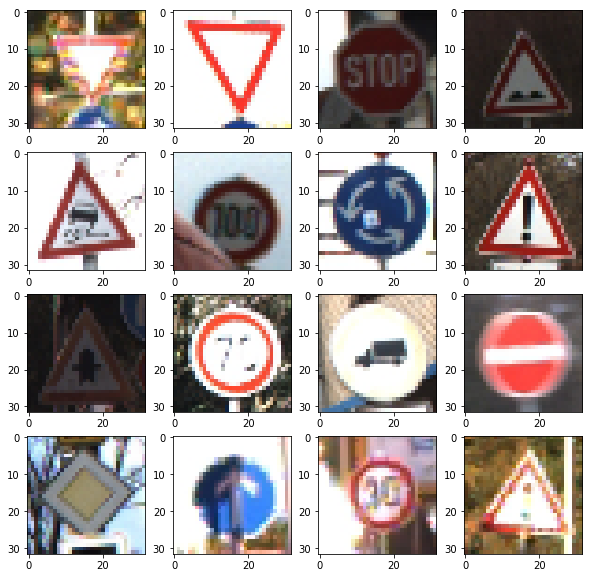

In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

from os import listdir
from os.path import isfile, join
import cv2

mypath = "./traffic-signs-news"

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

X_new_data = np.uint8(np.zeros((16,32,32,3)))
y_new = [13, 13, 14, 22, 23, 7, 40, 18, 11, 4, 16, 17, 12, 35, 1, 26]

i = 0
for file in onlyfiles:
    final_path = mypath + '/' + file
    im = cv2.imread(final_path, cv2.IMREAD_COLOR)
    b,v,r = cv2.split(im)
    im = cv2.merge([r,v,b])
    im = cv2.resize(im, (32, 32))
    X_new_data[i] = im
    i += 1

print(len(X_new_data))

plt.figure(figsize=(10, 10))
for i in range(len(X_new_data)):
    image = X_new_data[i]
    plt.subplot(4, 4, i+1)
    plt.imshow(image)
plt.show()


### Predict the Sign Type for Each Image

In [14]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

def predict(X_data, sess):
    return sess.run(tf.argmax(input=logits, axis=1), feed_dict={x: X_new_data, keep_prob: 1.0})

with tf.compat.v1.Session() as sess:
    saver.restore(sess, './lenet')
    predictions = predict(X_new_data, sess)

INFO:tensorflow:Restoring parameters from ./lenet


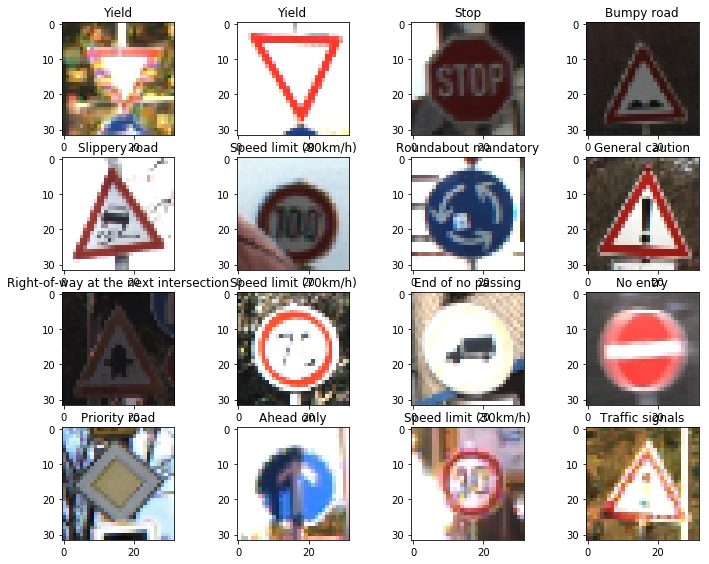

In [15]:
plt.figure(figsize=(12, 12))
for i in range(len(X_new_data)):
    plt.subplot(5, 4, i+1)
    plt.title(dict_signs[predictions[i]])
    plt.imshow(X_new_data[i])
plt.show()

### Analyze Performance

In [16]:
### Calculate the accuracy for these 5 new images.
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
assert len(predictions) == len(y_new)

errors = 0
for i in range(len(predictions)):
    if predictions[i] != y_new[i]:
        errors += 1

accuracy_new = len(predictions) / errors
print("Predictions: {}, errors: {}".format(len(predictions), errors))
print("accuracy in percentage :")
print(100 - (100 * errors) / len(predictions))

Predictions: 16, errors: 2
accuracy in percentage :
87.5


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [24]:
# TODO convert

### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web.
### Feel free to use as many code cells as needed.
def top_k(X_new, sess):
    return sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=3), feed_dict={x: X_new, keep_prob: 1.0})

with tf.compat.v1.Session() as sess:
    saver.restore(sess, './lenet')
    top_k = top_k(X_new_data, sess)

prob, top = top_k[0], top_k[1]

assert len(prob) == len(top) == len(y_new)

for i in range(len(prob)):
    print("{} was predicted :".format(dict_signs[y_new[i]]))
    for j in range(3):
        print("      {} at {}%".format(dict_signs[top[i][j]],prob[i][j]))
    print()


INFO:tensorflow:Restoring parameters from ./lenet
Yield was predicted :
      Yield at 0.9997619986534119%
      Speed limit (50km/h) at 0.0001685354218352586%
      Road work at 3.1417046557180583e-05%

Yield was predicted :
      Yield at 0.9999943971633911%
      Speed limit (30km/h) at 3.6590374747902388e-06%
      Keep right at 8.095304337984999e-07%

Stop was predicted :
      Stop at 0.9997864365577698%
      Speed limit (80km/h) at 0.00017442155512981117%
      Speed limit (30km/h) at 1.4265858226281125e-05%

Bumpy road was predicted :
      Bumpy road at 0.9658303260803223%
      Road narrows on the right at 0.01878529228270054%
      Dangerous curve to the right at 0.007164016831666231%

Slippery road was predicted :
      Slippery road at 0.9042190313339233%
      Dangerous curve to the left at 0.06443075835704803%
      Dangerous curve to the right at 0.026664407923817635%

Speed limit (100km/h) was predicted :
      Speed limit (80km/h) at 0.6539806723594666%
      Speed l